# Jones Calculus Documentation

** Scott Prahl**


In [1]:
# Execute this cell first
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pypolar.jones as jones
np.set_printoptions(suppress=True)

# To solve "No module named 'pypolar'", run on the command-line (or Anaconda prompt)
#      pip install --upgrade pypolar

In [2]:
dir(jones)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean',
 'draw_2D_field',
 'draw_3D_field',
 'draw_field',
 'draw_field_animated',
 'field_horizontal',
 'field_left_circular',
 'field_linear',
 'field_right_circular',
 'field_vertical',
 'intensity',
 'interpret',
 'jones',
 'op_attenuator',
 'op_fresnel_reflection',
 'op_fresnel_transmission',
 'op_half_wave_plate',
 'op_linear_polarizer',
 'op_mirror',
 'op_quarter_wave_plate',
 'op_retarder',
 'op_rotation',
 'phase']

# Basic Polarization Fields

In [2]:
light = jones.field_horizontal()
print("Jones vector for horizontally-polarized light")
print(light)

light = jones.field_vertical()
print("Jones vector for vertically-polarized light")
print(light)

light = jones.field_linear(np.radians(45))
print("Jones vector for 45° linearly polarized light")
print(light)

light = jones.field_right_circular()
print("Jones vector for right circularly polarized light")
print(light)

light = jones.field_left_circular()
print("Jones vector for left circularly polarized light")
print(light)

Jones vector for horizontally-polarized light
[1. 0.]
Jones vector for vertically-polarized light
[0. 1.]
Jones vector for 45° linearly polarized light
[0.70710678 0.70710678]
Jones vector for right circularly polarized light
[0.70710678+0.j         0.        -0.70710678j]
Jones vector for left circularly polarized light
[0.70710678+0.j         0.        +0.70710678j]


# Linear Polarizers

In [3]:
for theta in np.radians([0,45,90,-45]):
    print('Jones Matrix for perfect linear polarizer at angle theta=',theta/np.pi*180)
    L = jones.op_linear_polarizer(theta)
    print(L)
    print()

Jones Matrix for perfect linear polarizer at angle theta= 0.0
[[1. 0.]
 [0. 0.]]

Jones Matrix for perfect linear polarizer at angle theta= 45.0
[[0.5 0.5]
 [0.5 0.5]]

Jones Matrix for perfect linear polarizer at angle theta= 90.0
[[0. 0.]
 [0. 1.]]

Jones Matrix for perfect linear polarizer at angle theta= -45.0
[[ 0.5 -0.5]
 [-0.5  0.5]]



# Quarter-Wave Plates

In [4]:
for theta in np.radians([0,45,90,-45]):
    print('Jones Matrix for quarter wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = jones.op_quarter_wave_plate(theta)
    print(L)
    norm = L[0,0]
    print("... and when scaled by so top left element is unity")
    print(L/norm)
    print()

Jones Matrix for quarter wave plate with fast axis at angle theta= 0.0
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]
... and when scaled by so top left element is unity
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 45.0
[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678-0.j        ]]
... and when scaled by so top left element is unity
[[1.+0.j 0.+1.j]
 [0.+1.j 1.-0.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 90.0
[[0.70710678-0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
... and when scaled by so top left element is unity
[[ 1.+0.j -0.+0.j]
 [-0.+0.j  0.+1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= -45.0
[[ 0.70710678+0.j         -0.        -0.70710678j]
 [-0.        -0.70710678j  0.70710678-0.j        ]]
... and when scaled by so top left element i

# Half-Wave Plates

In [5]:
for theta in np.radians([0,90]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = jones.op_half_wave_plate(theta)
    print(L)
    norm = L[0,0]
    print("... and when scaled by so top left element is unity")
    print(L/norm)
    print()
    
for theta in np.radians([45,-45]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = jones.op_half_wave_plate(theta)
    print(L)
    print()

Jones Matrix for half-wave plate with fast axis at angle theta= 0.0
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]
... and when scaled by so top left element is unity
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 90.0
[[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]
... and when scaled by so top left element is unity
[[ 1.-0.j -0.+0.j]
 [-0.+0.j -1.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 45.0
[[0.+0.j 0.+1.j]
 [0.+1.j 0.-0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= -45.0
[[ 0.+0.j -0.-1.j]
 [-0.-1.j  0.-0.j]]



# Visualization

<IPython.core.display.Javascript object>


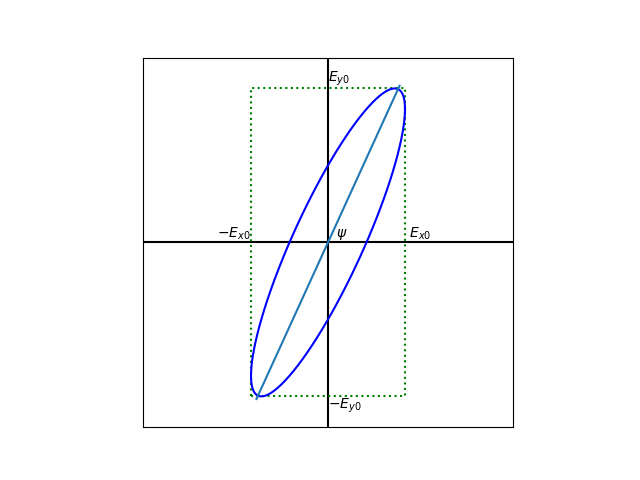

In [3]:
phi=np.pi/6
v = np.array([1,2*np.exp(phi*1j)])
aplt = jones.draw_field_ellipse(v)
aplt.show()

<IPython.core.display.Javascript object>


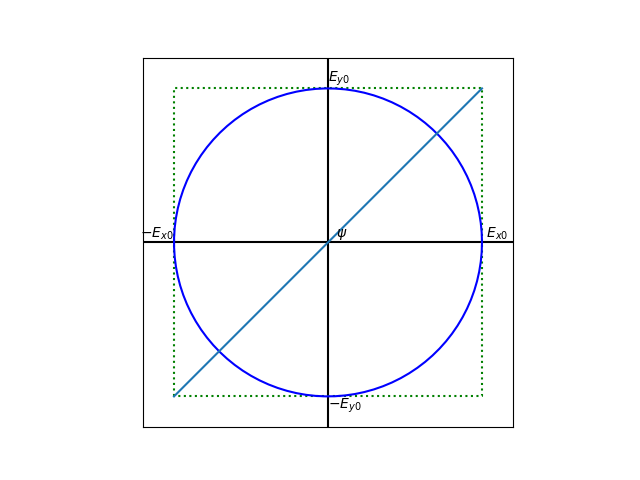

In [5]:
phi=np.pi/6
v = jones.field_right_circular()
aplt = jones.draw_field_ellipse(v)
aplt.show()

<IPython.core.display.Javascript object>


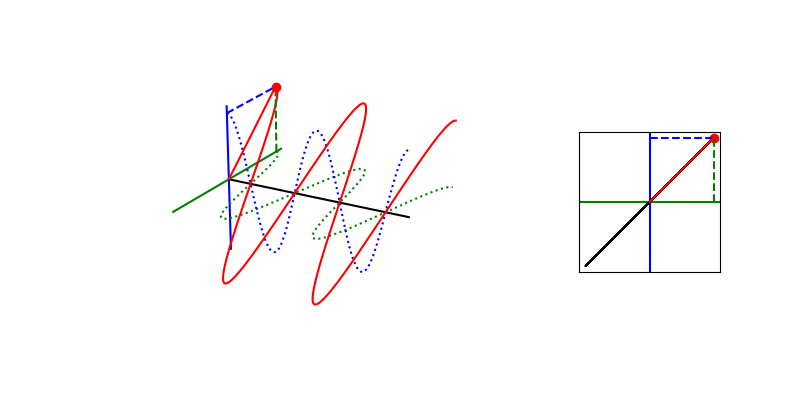

In [6]:
theta = np.radians(45)
v = jones.field_linear(theta)
aplt = jones.draw_field(v)
aplt.show()

<IPython.core.display.Javascript object>


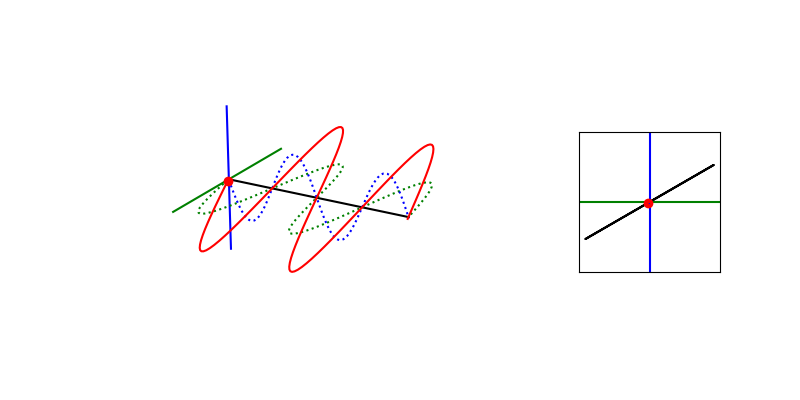

In [7]:
theta = np.radians(30)
v = jones.field_linear(theta)
jones.draw_field_animated(v)

<IPython.core.display.Javascript object>


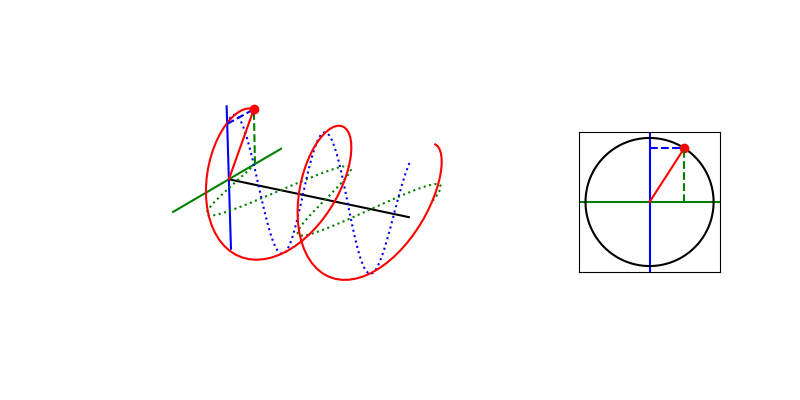

In [8]:
v = jones.field_left_circular()
jones.draw_field_animated(v)

<IPython.core.display.Javascript object>


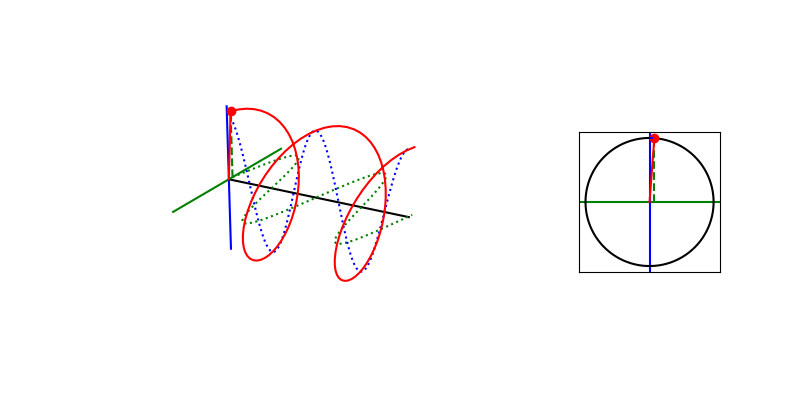

In [9]:
v=jones.field_right_circular()
jones.draw_field_animated(v)

# Field Interpretation

In [19]:
# Shurcliff 1964, page 28
v=np.array([0.3*np.exp(1j*np.pi/2),0.5*np.exp(-1j*0.2)])

gamma=jones.phase(v)
print('gamma=%.2f'%(gamma*180/np.pi))

psi=jones.ellipse_psi(v)
print('psi=%.2f'%(psi*180/np.pi))

alpha=jones.ellipse_azimuth(v)
print('alpha=%.2f'%(alpha*180/np.pi))

chi=jones.ellipse_ellipticity(v)
print('chi=%.2f'%(chi*180/np.pi))

a,b = jones.ellipse_axes(v)
print('a/b=%.2f'%(b/a))

gamma=-11.46
psi=59.28
alpha=59.04
chi=-5.02
a/b=0.09


In [10]:
v=jones.field_horizontal()
jones.interpret(v)

'Linear polarization at 0.000000 degrees CCW from x-axis'

In [15]:
v=jones.field_vertical()
jones.interpret(v)

'Linear polarization at 90.000000 degrees CCW from x-axis'

In [16]:
theta = np.radians(45)
v=jones.field_linear(theta)
jones.interpret(v)

'Linear polarization at 45.000000 degrees CCW from x-axis'

In [23]:
v=np.array([3*np.exp(-1j*np.pi), 3*np.exp(-1j*np.pi/3)])
jones.interpret(v)

'Left circular polarization'

In [17]:
v=np.array([1,-1j])
jones.interpret(v)

'Right circular polarization'

# Optical isolator

In [11]:
A = jones.field_linear(np.pi/4)
B = jones.op_linear_polarizer(0)
C = jones.op_quarter_wave_plate(np.pi/4)
D = jones.op_linear_polarizer(np.pi/2)

In [12]:
np.dot(np.dot(D,C),B)

matrix([[0.+0.j        , 0.+0.j        ],
        [0.+0.70710678j, 0.+0.j        ]])

In [14]:
np.matmul(np.matmul(D,C),B)

matrix([[0.+0.j        , 0.+0.j        ],
        [0.+0.70710678j, 0.+0.j        ]])

In [15]:
np.dot(D*C*B,A)

matrix([[0.+0.j , 0.+0.5j]])

In [16]:
np.matmul(np.matmul(np.matmul(D,C),B),A.T)

matrix([[0.+0.j , 0.+0.5j]])

In [17]:
A = jones.field_linear(0)
B = jones.op_linear_polarizer(np.pi/4)
C = jones.op_quarter_wave_plate(0)
D = jones.op_mirror()
E = jones.op_quarter_wave_plate(0)
F = jones.op_linear_polarizer(-np.pi/4)

In [18]:
np.dot(F*E*D*C*B,A)

matrix([[ 0.+0.j, -0.-0.j]])